# Contents

Part 1: Load Data

Part 2: Tokenizing and Stemming

Part 3: TF-IDF

Part 4: K-means Clustering

Part 5: Topic Modeling - Latent Dirichlet Allocation

## Part 1: Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import numpy as np
import pandas as pd
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Load data into dataframe
df = pd.read_csv('watch_reviews.tsv', sep='\t', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkip

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [5]:
# Remove missing reviews
df.dropna(subset=['review_body'],inplace=True)

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [8]:
# use the first 1000 data as our training data
data = df.loc[:999, 'review_body'].tolist()

In [9]:
data[0:5]

['Absolutely love this watch! Get compliments almost every time I wear it. Dainty.',
 'I love this watch it keeps time wonderfully.',
 'Scratches',
 'It works well on me. However, I found cheaper prices in other places after making the purchase',
 "Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch"]

## Part 2: Tokenizing and Stemming

In [10]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br")
stopwords.append("watch")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:5])

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we']


In [11]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def tokenization_and_stemming(text):

    # tokwnize the document into words and get rid of stop words and the non-letters
    words = [w for w in nltk.word_tokenize(text) if w.lower() not in stopwords and w.isalpha()]

    # stemming
    stems = [stemmer.stem(t) for t in words]
    return stems

## Part 3: TF-IDF



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.995, 
                              max_features=1000,
                              min_df=0.01, 
                              stop_words='english',
                              use_idf=True, 
                              tokenizer=tokenization_and_stemming, 
                              ngram_range=(1,1))

tfidf_matrix = vectorizer.fit_transform(data) # Get matrix with tfidf model (vectorizer)

print(tfidf_matrix.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  % sorted(inconsistent)


(1000, 239)


In [ ]:
tfidf_matrix

<1000x239 sparse matrix of type '<class 'numpy.float64'>'
	with 6891 stored elements in Compressed Sparse Row format>

## Part 4: K-means Clustering

In [13]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 5

km_model = KMeans(n_clusters=num_clusters, init = "k-means++")
km_model.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [14]:
# get clusters labels
clusters = km_model.labels_.tolist()

In [15]:
# center for each cluster, tfidf value indicates the importances of the words to the cluster
km_model.cluster_centers_

array([[0.0037499 , 0.        , 0.        , ..., 0.00259154, 0.        ,
        0.01800249],
       [0.00566492, 0.0043783 , 0.00383447, ..., 0.00654088, 0.01803735,
        0.01442134],
       [0.        , 0.04201663, 0.        , ..., 0.01244583, 0.01749062,
        0.00407598],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00851693,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00784247,
        0.        ]])

### Find keywords for each review

In [16]:
# transform matrix from sparse matrix to a list
dense = tfidf_matrix.todense()
dense_list = dense.tolist()

In [17]:
terms = vectorizer.get_feature_names() # get feature names (words name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# find keywords (those with tfidf value > 0) in each review
all_keywords = []

for description in dense_list:
  x = 0
  keywords = []
  for word in description:
    if word > 0:
      keywords.append(terms[x])
    x += 1
  all_keywords.append(keywords)

In [19]:
len(all_keywords)

1000

In [20]:
print(data[0])
print(all_keywords[0])

Absolutely love this watch! Get compliments almost every time I wear it. Dainty.
['absolut', 'compliment', 'everi', 'love', 'time', 'wear']


### Find keywords for each cluster

In [21]:
# create DataFrame films from all of the input files.
review_df = { 'review': df[:1000].review_body, 'cluster': clusters}
review_df = pd.DataFrame(review_df, columns = ['review', 'cluster'])

In [22]:
review_df.head()

,review,cluster
0,Absolutely love this watch! Get compliments al...,2
1,I love this watch it keeps time wonderfully.,2
2,Scratches,1
3,"It works well on me. However, I found cheaper ...",1
4,Beautiful watch face. The band looks nice all...,1


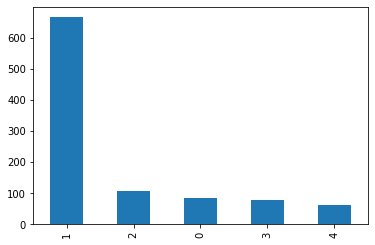

In [23]:
review_df['cluster'].value_counts().plot.bar()

In [24]:
Cluster_keywords = {}

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]  # sort index by cluster_centers from large to small value

num_keywords = 6

# find keywords for each topic
for i in range(num_clusters):
    Cluster_keywords[i] = []
    for ind in order_centroids[i, :num_keywords]:      # find num_keywords in the cluster_centers (a high dimensional point)
        Cluster_keywords[i].append(terms[ind])

In [25]:
Cluster_keywords

{0: ['great', 'look', 'price', 'work', 'product', 'love'],
 1: ['look', 'like', 'work', 'band', 'time', 'beauti'],
 2: ['love', 'wife', 'look', 'husband', 'beauti', 'absolut'],
 3: ['good', 'product', 'qualiti', 'seller', 'price', 'love'],
 4: ['nice', 'price', 'look', 'realli', 'simpl', 'good']}

In [26]:
# see the reviews that are associated with the clusters
for i in range(num_clusters):
  print("Cluster " + str(i) + ":")
  print(review_df.loc[review_df.cluster == i, "review"])
  print("\n")

Cluster 0:
6      for my wife and she loved it, looks great and ...
8      Watch is perfect. Rugged with the metal &#34;B...
28     Perfect Condition, Arrived on Time,Works & Loo...
71                            great looking sports watch
86     A great automatic, but I give it 4 stars for b...
                             ...                        
945            Have used it several times.  Works great!
965    This is truly a magnificent watch.. it's a qua...
967      Metal feels kinda cheap, but watch looks great.
968              Great looking, stylish very comfortable
987                                          Great watch
Name: review, Length: 86, dtype: object


Cluster 1:
2                                              Scratches
3      It works well on me. However, I found cheaper ...
4      Beautiful watch face.  The band looks nice all...
7      I was about to buy this thinking it was a Swis...
9      Great quality and build.<br />The motors are r...
                        

## Part 5: Topic Modeling - Latent Dirichlet Allocation

In [123]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation

# number of topics as prior
n_topics = 5 

lda = LatentDirichletAllocation(n_components = n_topics)

In [124]:
# document-topic matrix
documents_topics_matrix = lda.fit_transform(tfidf_matrix)

print(documents_topics_matrix.shape) # 1000 documents, 5 topics
print(documents_topics_matrix)

(1000, 5)
[[0.43472319 0.06114825 0.06186087 0.38212521 0.06014249]
 [0.65705155 0.08501999 0.08480206 0.08603513 0.08709128]
 [0.2        0.2        0.2        0.2        0.2       ]
 ...
 [0.100048   0.59991105 0.10000012 0.1000001  0.10004073]
 [0.72286202 0.07261981 0.06786079 0.06731978 0.06933761]
 [0.06741121 0.0678295  0.06738155 0.07014028 0.72723745]]


In [125]:
# topics-words matrix
topics_words_matrix = lda.components_

print(topics_words_matrix.shape) # 5 topics, 239 words features
print(topics_words_matrix)

(5, 239)
[[ 3.30287453  0.20201627  0.88903939 ...  2.29999329  0.20067567
   2.28213627]
 [ 0.20186436  0.55279408  0.20034685 ...  4.02384497  0.96125319
   0.76479746]
 [ 0.20147414  4.5306668   0.20129852 ...  0.20533907  0.20211491
   2.6361439 ]
 [ 1.17801161  3.00918036  1.53577871 ...  0.20264507  0.39341299
   4.1241629 ]
 [ 0.21110243  0.20110531  0.72729161 ...  0.20387491 14.30393104
   2.78986492]]


### Document-Topics Level Analysis

In [126]:
# make a document-topics dataframe
# row names
doc_names = ["Document" + str(i) for i in range(len(documents_topics_matrix))]
# columns names
topics_names = ["Topics" + str(i) for i in range(n_topics)]

documents_topics_df = pd.DataFrame(documents_topics_matrix, index = doc_names, columns = topics_names)

In [127]:
# get major topics within each document
topic = np.argmax(documents_topics_df.values, axis=1)
documents_topics_df['topic'] = topic

In [128]:
documents_topics_df.head()

,Topics0,Topics1,Topics2,Topics3,Topics4,topic
Document0,0.434723,0.061148,0.061861,0.382125,0.060142,0
Document1,0.657052,0.085020,0.084802,0.086035,0.087091,0
Document2,0.200000,0.200000,0.200000,0.200000,0.200000,0
Document3,0.062731,0.058934,0.062728,0.059697,0.755910,4
Document4,0.040212,0.041233,0.039448,0.045469,0.833639,4


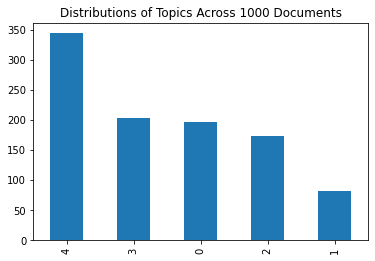

In [129]:
documents_topics_df['topic'].value_counts().plot.bar(title = "Distributions of Topics Across 1000 Documents")

### Topics-Words Level Analysis

In [130]:
# make topics-words dataframe
# column names (words names)
# row names (topics names)

topics_words_df = pd.DataFrame(lda.components_, index = topics_names, columns = vectorizer.get_feature_names_out())

In [131]:
topics_words_df.head()

,abl,absolut,accur,actual,adjust,alarm,alreadi,alway,amaz,amazon,...,weight,went,wife,wind,wish,work,worn,worth,wrist,year
Topics0,3.302875,0.202016,0.889039,0.201779,0.200307,0.200123,0.211366,1.783946,7.004980,0.204479,...,1.885767,0.206626,0.200901,0.849769,1.010869,4.538633,0.200318,2.299993,0.200676,2.282136
Topics1,0.201864,0.552794,0.200347,0.200116,0.200117,0.200247,0.684577,0.200689,0.200165,0.201428,...,0.202506,0.200340,0.202858,1.794492,0.200741,1.978873,0.200151,4.023845,0.961253,0.764797
Topics2,0.201474,4.530667,0.201299,0.200547,0.491549,3.039136,1.290174,0.202849,0.651764,4.474232,...,0.200195,1.005365,0.200955,0.205186,0.203767,28.551887,0.232505,0.205339,0.202115,2.636144
Topics3,1.178012,3.009180,1.535779,3.609286,0.204595,2.148057,0.202598,1.044586,2.709882,1.710483,...,0.204130,1.479882,11.836799,0.217072,2.369023,0.671958,3.324142,0.202645,0.393413,4.124163
Topics4,0.211102,0.201105,0.727292,1.644669,5.196602,0.352849,3.374655,1.607932,0.202044,0.211919,...,3.225764,0.824961,0.200884,1.167190,0.786109,5.320318,0.245977,0.203875,14.303931,2.789865


In [132]:
# get top n key words for given topic list
def get_top_n_keywords(df, n_keywords):
  """
  Takes in a topics-words dataframe
  Returns a dataframe with top n keywords for each topic
  """
  res = []
  for i in range(df.shape[0]):
    res.append(df.iloc[i, :].sort_values(ascending = False)[:n_keywords].index.tolist())
  return res

In [136]:
num_keywords = 10

topics_keywords_list = get_top_n_keywords(topics_words_df, n_keywords = num_keywords)

# column names
col_names = ["Top_" + str(i+1) + "_Word" for i in range(num_keywords)]

topics_keywords_df = pd.DataFrame(topics_keywords_list, columns = col_names, index = topics_names)

In [137]:
topics_keywords_df.head()

,Top_1_Word,Top_2_Word,Top_3_Word,Top_4_Word,Top_5_Word,Top_6_Word,Top_7_Word,Top_8_Word,Top_9_Word,Top_10_Word
Topics0,great,price,product,excel,beauti,look,qualiti,time,love,exact
Topics1,good,love,thank,better,wear,stylish,comfort,qualiti,worth,look
Topics2,work,day,batteri,month,use,gift,fast,broke,recommend,tri
Topics3,perfect,like,expect,love,awesom,wear,color,wife,pretti,want
Topics4,nice,love,look,band,big,face,wrist,like,larg,realli


In [135]:
# let's make some visualizations for topics 4' keywords (as topic 4 is the hottest topics among 5)
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10)

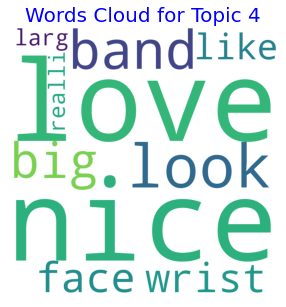

In [152]:
wordcloud.generate(' '.join(topics_keywords_df.iloc[-1, :]))

plt.figure(figsize=(8, 5))
plt.title(label = 'Words Cloud for Topic 4', fontsize=20, color = 'blue')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

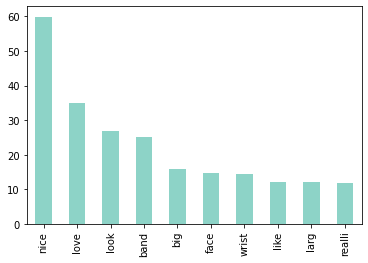

In [167]:
topics_words_df[topics_keywords_df.iloc[-1, :].tolist()].iloc[-1, :].plot.bar(cmap='Set3')